<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_isco3/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02_SVCによる分類モデルの評価
学習した分類モデルを読み込んで、評価してみましょう。

---

### 🌐 参考サイト
#### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

---

### 🐣 はじめてみよう
- Pandasはデータサイエンティストや機械学習エンジニアが日々の仕事でよく利用するツールであり、Pythonでデータ分析を行う際には必須のライブラリとなっています。
- Scikit-learnは機械学習を扱うデータサイエンティストや研究者にとって、強力で信頼性の高いツールとなっています。
- 今回の講義では、このPandasとScikit-learnを使った機械学習について学んでいきましょう。

### ⬇️ ライブラリのインストール

In [ ]:
# matplotlib日本語対応ライブラリのインストール
!pip install matplotlib-fontja

### 📁 GoogleDrive の Mount

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショートカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

### ➜]　ライブラリのimport

In [1]:
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # matplotlib.pyplot モジュールを読み込む（可視化ライブラリ。細かいカスタマイズが可能）
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）
import joblib # モデル保存・読み込みライブラリ

from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割ライブラリ
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

from imblearn.over_sampling import SMOTE  # 不均衡データサンプリングライブラリ
from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス

### ✍️ 定数の定義
- データファイルパスを定義しておきます
- データ読み込みの際にご使用してください。修正は不要です

In [2]:
# データファイルパス定義
WINE_CSV = "./data/wine.csv"
IRIS_CSV = "./data/iris.csv"

# モデルファイルパス定義
WINE_SVC_MODEL = "./data/wine_svc.joblib"
IRIS_SVC_MODEL = "./data/iris_svc.joblib"

# RANDOM SEED 定義
RANDOM_SEED = 0

### 🍇 サンプルプログラム2 ワイン分類モデルの評価

以下の手順で、ワインの分類モデルを評価します。
- ワインのデータセットを読み込む
- SVCを使用して学習したモデルをjoblib.load()で読み込む
- 正答率(accuracy)の表示
- 不正解の個数を表示
- 分類レポート(classification report)の表示
- 混合行列(confusion matrix)の表示
- 評価結果を考察

In [3]:
# ワインのデータセットを読み込み
df_wine = pd.read_csv(WINE_CSV, index_col=None) # indexに使用するカラムが無いため、index_col=Noneを指定します

# 説明変数と目的変数に分ける
X = df_wine.iloc[:,:-1]
y = df_wine.iloc[:,-1]

# 訓練データとテストデータに分割する(学習時と同じRANDOM_SEEDを使用することで、分割結果を再現できます)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED) # 特に理由がない限りは、学習データ：テストデータは 7：3 でわけましょう。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=RANDOM_SEED, stratify=y)  # stratifyを指定すると層別にきれいに分けることができます

In [4]:
# 保存したモデルを読み込み
svc_model = joblib.load(WINE_SVC_MODEL)


In [5]:
# 正答率(accuracy)の表示
accuracy = svc_model.score(X_test, y_test)    # 正答率を調べる
print(f"正答率(accuracy) = {accuracy}")

# 不正解の個数を表示
predicted = svc_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率(accuracy) = 0.7777777777777778
誤った個数：12


In [6]:
# 分類レポート(classification report)を表示する
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
1,0.894737,0.894737,0.894737,19.000000
2,0.740741,0.909091,0.816327,22.000000
3,0.625000,0.384615,0.476190,13.000000
accuracy,0.777778,0.777778,0.777778,0.777778
macro avg,0.753493,0.729481,0.729085,54.000000
weighted avg,0.767061,0.777778,0.762031,54.000000


- precision(適合率) --- 正解と予測したもののうち、正しかった確率
- recall(再現率) --- 実際に正解のデータのうち、どれだけ正解と予測できたかを示す確率
- f1-score --- PrecisionとRecall の調和平均

confusion matrix


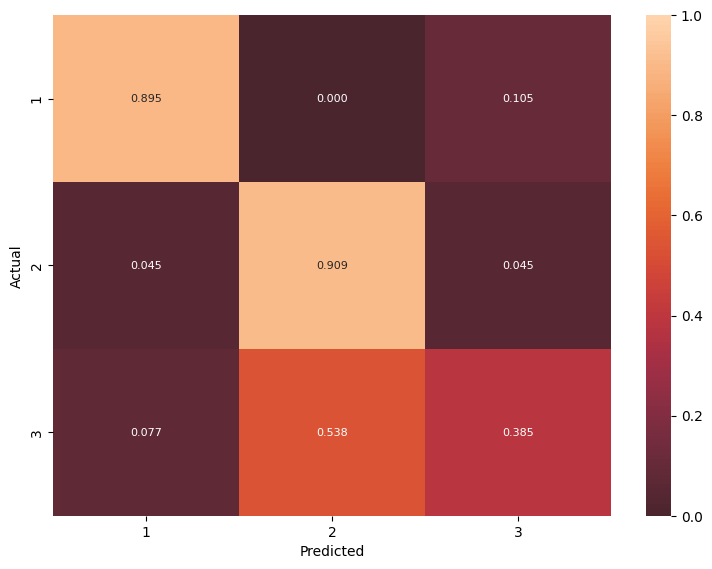

In [7]:
# 混合行列(confusion matrix)を表示する
# 結果ラベルの取得(混合行列の表示で使います)
result_labels = list(df_wine["target"].unique())

# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 考察
- classification_reportをみると品種3のf1-scoreが0.476190と当てられていない
  - 前回のpandasの授業ではclass1とclass3が比較的明確に分かれていたためclass3の精度が悪いのは予想外
  - データが少ない（testデータでは特に13件しかない）のが大きな要因と思われる
- 品種3のrecallが0.384615とかなり低いことから、モデルが品種1と品種2を予測するケースが多かったものと思われる
  - 逆に言うと、他のモデルを使用したり、データの渡し方次第で改善できる可能性はある
- 考えられる対策
  - 不均衡データの是正
  - モデルの変更

### 🪻 練習プログラム2 あやめ分類モデルの評価 (30点)

以下の手順で、あやめの分類モデルを評価してみましょう。  
1️⃣ あやめのデータセットを読み込む  
2️⃣ SVCを使用して学習したモデルをjoblib.load()で読み込む  
3️⃣ 正答率(accuracy)の確認  
4️⃣ 不正解の個数の確認  
5️⃣ 分類レポート(classification report)の確認  
6️⃣ 混合行列(confusion matrix)の確認  
7️⃣ 評価結果を考察  

<!-- PROBLEM_TYPE: SYNTAX_EXERCISE -->

In [ ]:
# あやめのデータセットを読み込み

# 説明変数と目的変数に分ける

# 訓練データとテストデータに分割する(学習時と同じRANDOM_SEEDを使用することで、分割結果を再現できます)


In [ ]:
# 保存したモデルを読み込み


In [ ]:
# 正答率(accuracy)の表示

# 不正解の個数を表示


正答率(accuracy) = 0.9777777777777777
誤った個数：1


In [ ]:
# 分類レポート(classification report)を表示する


classification report


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,16.000000
Iris-versicolor,1.000000,0.944444,0.971429,18.000000
Iris-virginica,0.916667,1.000000,0.956522,11.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.972222,0.981481,0.975983,45.000000
weighted avg,0.979630,0.977778,0.977943,45.000000


confusion matrix


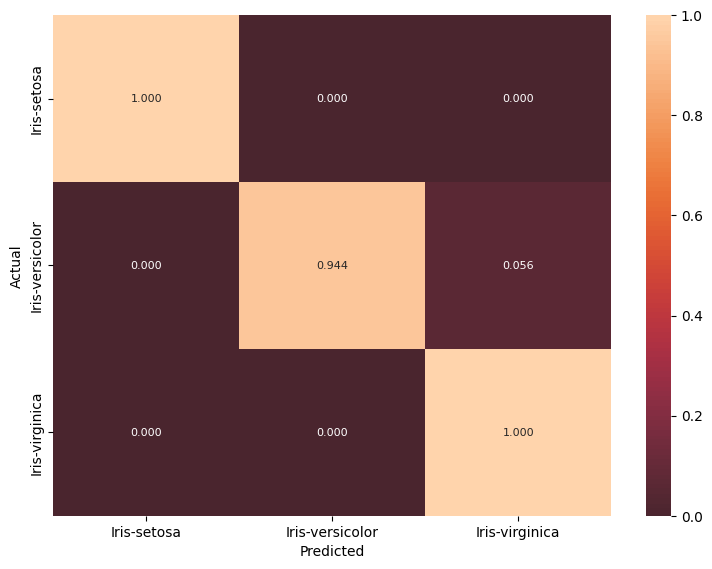

In [ ]:
# 混合行列(confusion matrix)を表示する


In [ ]:
# 考察

# こちらにソースコメントで考察を記述して下さい。
# コードセルに書かれたコメントを読み取って採点していますので、マークダウンには書かないでください。

In [ ]:
#@title 送信処理用共通プログラム（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown 解答の送信に必要です。（中身は絶対に修正しないでください）

import os
os.makedirs(".client/python", exist_ok=True)  # 隠しフォルダを作成
!wget -q https://raw.githubusercontent.com/YasuharuSuzuki/25_isco3/main/91_notebook_client/src/setup.sh -O .client/setup.sh   # 外部コードをダウンロードして隠しフォルダに配置
!chmod +x ./.client/setup.sh
!bash ./.client/setup.sh # 実行

# モジュールの初期化
exec(open('.client/client_setup.py').read())

# ノートブック固有の設定
NOTEBOOK_PATH = "04_機械学習(分類)/02_SVCによる分類モデルの評価.ipynb"
set_notebook_config(NOTEBOOK_PATH)

In [ ]:
#@title 問2 送信ボタン表示（以下のセルを「▶ 実行」して下さい。） { display-mode: "form" }
#@markdown メールアドレスを取得して、送信ボタンを押してください（中のプログラムは絶対に修正しないでください）
display(create_submit_button(problem_number=2, button_name="練習プログラム"))